# Find HBA in na
This notebook shows how to use Pandas/Dataframes to find the HBA1 gene in nucleotide sequences.

## Installation
First, install the the API library into your virtual environment:

In [ ]:
%pip install --quiet ncbi-cloudblast-api

Note: you may need to restart the kernel to use updated packages.


For this demo, you also need to install `pandas` and `matplotlib`:

In [ ]:
%pip install --quiet pandas==0.24.2 matplotlib

Note: you may need to restart the kernel to use updated packages.


We also need to enable matplotlib for notebook

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

## Before you start
To use this libray, you must provide the address for a CloudBlast API service endpoint:

In [ ]:
API_ADDRESS = '35.236.249.25:5000'

## Perform a Blast Search

In [ ]:
from ncbi_cloudblast_api.api_client import APIClient

if not API_ADDRESS:
    raise ValueError("Please set value for API_ADDRESS in the previous step.")

client=APIClient(API_ADDRESS)

`NM_000558.5` is the mRNA for human hemoglobin subunit alpha 1 (*HBA1*)

In [ ]:
query="NM_000558.5"

print (f'Running Blast search for: {query} ...')

# "search" method will wait for the Blast search to complete
# and then returns the result.
res = client.search(accession=query)
print ("Done.")

Running Blast search for: NM_000558.5 ...
Done.


## Show only the first (strongest) match for each organism.

In [ ]:
from pandas import DataFrame

# A list of fields to get from the search result
fields = ["qaccver", "saccver", "pident", "length", "evalue", "bitscore", "staxid", "qstart"]

# A slice of search result for the above fields
df = res.as_dataframe()[fields]

In [ ]:
# First 20 HSP's (in default sort order)
df.head()

,qaccver,saccver,pident,length,evalue,bitscore,staxid,qstart
0,NM_000558.5,NM_000558.5,100.00000,577,0.0,1066.637144,9606,1
1,NM_000558.5,BC005931.1,100.00000,577,0.0,1066.637144,9606,1
2,NM_000558.5,AK223392.1,99.82669,577,0.0,1061.097195,9606,1
3,NM_000558.5,BC032122.2,100.00000,563,0.0,1040.784048,9606,15
4,NM_000558.5,BC050661.1,100.00000,563,0.0,1040.784048,9606,15


Number of unique organisms:

In [ ]:
df.drop_duplicates(subset="staxid", keep="first")

,qaccver,saccver,pident,length,evalue,bitscore,staxid,qstart
0,NM_000558.5,NM_000558.5,100.000000,577,0.000000e+00,1066.637144,9606,1
5,NM_000558.5,X00226.1,98.093588,577,0.000000e+00,1003.851055,9598,1
6,NM_000558.5,XM_010381857.1,97.746967,577,0.000000e+00,992.771158,61622,1
7,NM_000558.5,XM_024233299.1,97.573657,577,0.000000e+00,989.077858,9601,1
8,NM_000558.5,XM_011960067.1,97.053726,577,0.000000e+00,970.611362,336983,1
9,NM_000558.5,XM_007979843.1,96.880416,577,0.000000e+00,965.071413,60711,1
10,NM_000558.5,XM_012497192.1,96.707106,577,0.000000e+00,961.378113,61853,1
12,NM_000558.5,XM_026452618.1,96.533795,577,0.000000e+00,953.991515,591936,1
14,NM_000558.5,XM_003809390.3,96.533795,577,0.000000e+00,953.991515,9597,1
19,NM_000558.5,XM_005590731.2,96.187175,577,0.000000e+00,942.911617,9541,1


In [ ]:
df['staxid'].value_counts()

10042      107
9606        72
9600        35
9823        15
32630        7
61853        5
9598         5
9615         4
118797       4
143302       4
9685         4
9544         4
9838         4
4577         4
9913         4
9755         3
1706337      3
34884        3
132908       3
59463        3
9555         3
30608        3
419612       3
182674       3
9595         3
9728         3
37293        3
9430         3
9691         3
286419       3
          ... 
554455       1
9696         1
291302       1
9704         1
105295       1
30538        1
9541         1
9538         1
9408         1
64717        1
146132       1
58065        1
478698       1
482537       1
1737458      1
89101        1
40151        1
43780        1
130821       1
130825       1
9716         1
1378068      1
263448       1
75567        1
10041        1
9531         1
1026970      1
9534         1
9798         1
33548        1
Name: staxid, Length: 155, dtype: int64

Number of matches per taxonomic node.

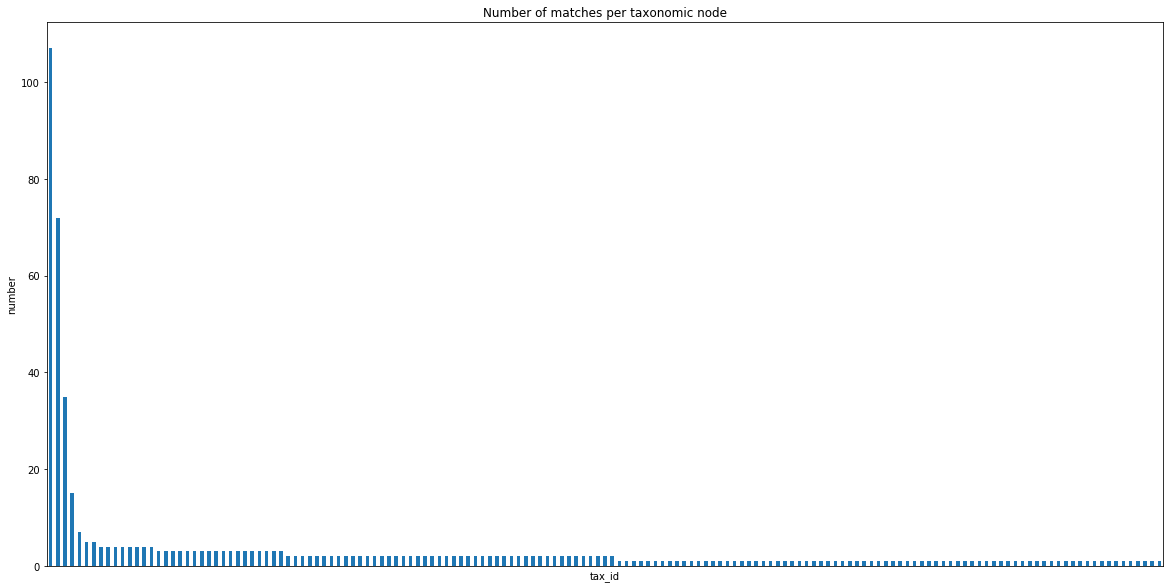

In [ ]:
plt = df['staxid'].value_counts().plot.bar(rot=0)
plt.set_ylabel("number");
plt.set_xlabel("tax_id");
plt.set_title("Number of matches per taxonomic node");
plt.set_xticks([]);

Number of matches per subject sequence

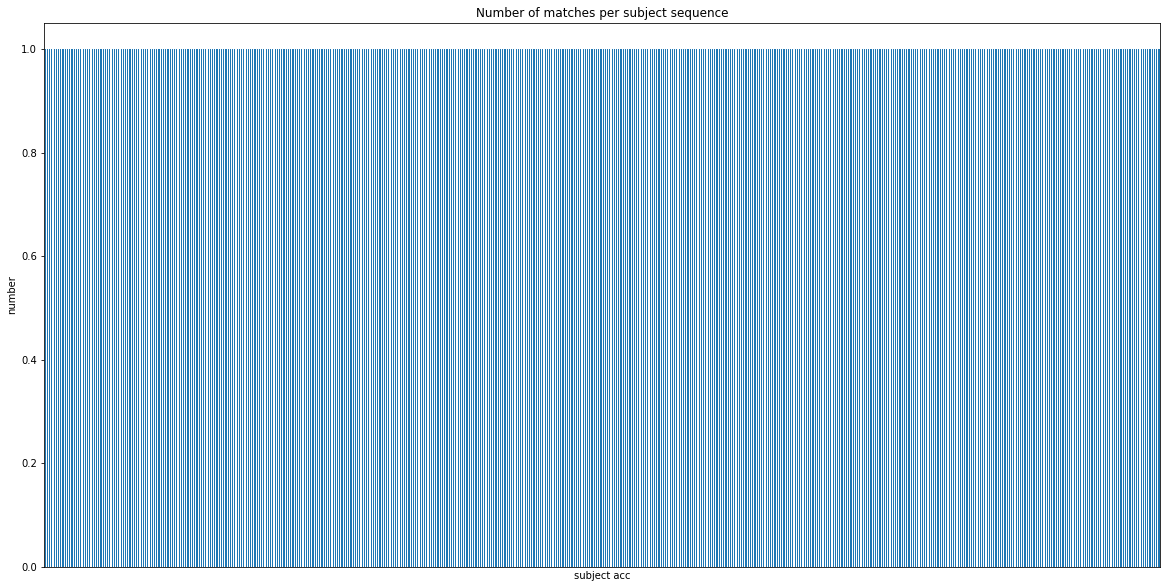

In [ ]:
plt = df['saccver'].value_counts().plot.bar(x='subject acc', y='number', rot=0)
plt.set_ylabel("number");
plt.set_xlabel("subject acc");
plt.set_title("Number of matches per subject sequence");
plt.set_xticks([]);